In [1]:
%%time
import malaya

CPU times: user 11.2 s, sys: 1.64 s, total: 12.9 s
Wall time: 17.6 s


In [2]:
%matplotlib inline

import pandas as pd
df = pd.read_csv('tests/02032018.csv',sep=';')
df = df.iloc[3:,1:]
df.columns = ['text','label']
corpus = df.text.tolist()

## Generate scatter plot for unsupervised clustering

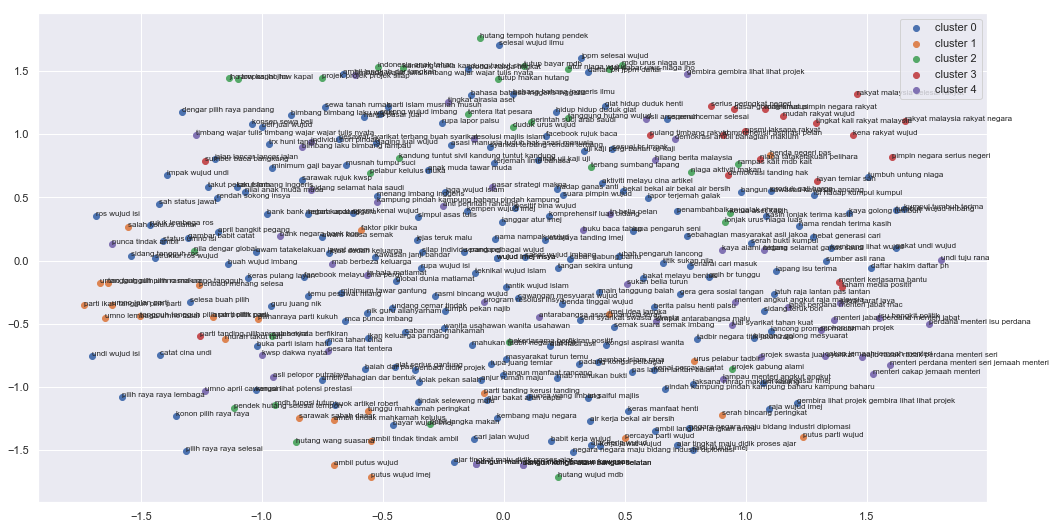

In [4]:
result_scatter = malaya.cluster.cluster_scatter(corpus,vectorizer='tfidf')

## Generate dendogram plot for unsupervised clustering

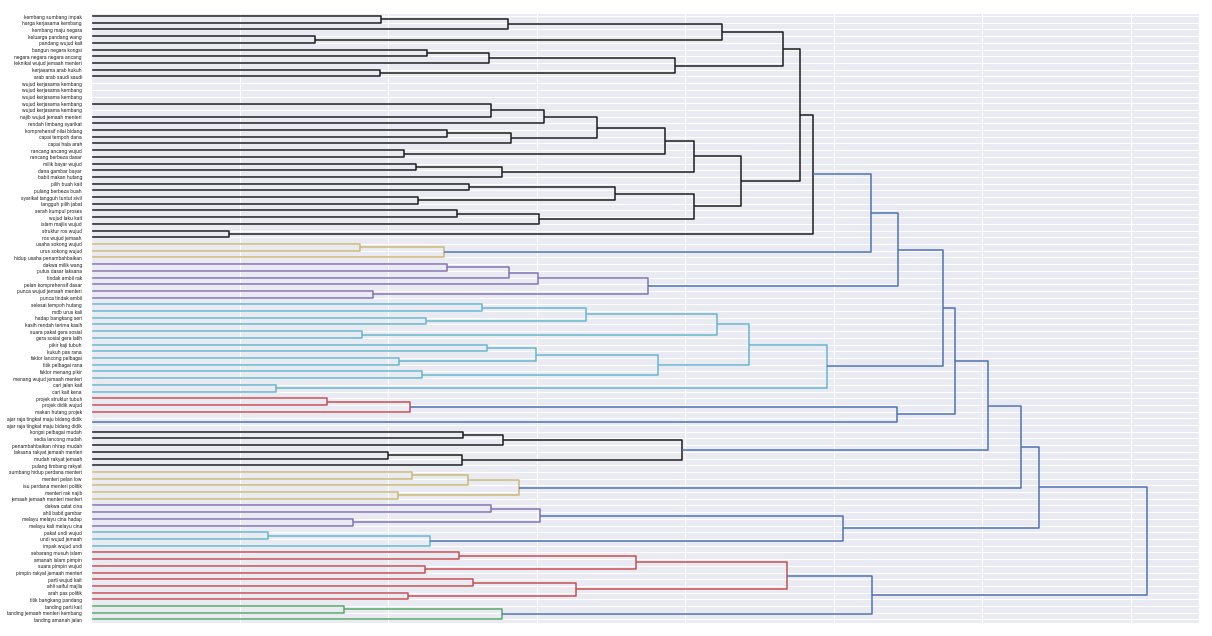

In [5]:
result_scatter = malaya.cluster.cluster_dendogram(corpus,vectorizer='tfidf')

## Generate undirected graph for unsupervised clustering

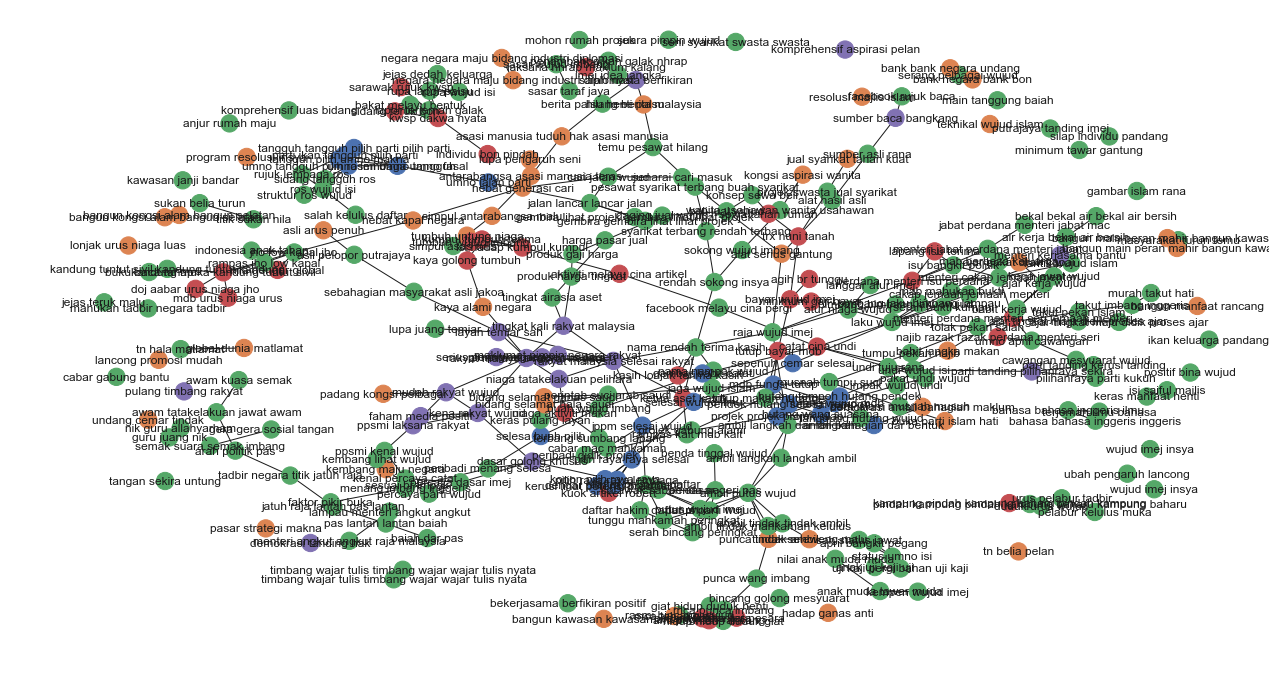

In [6]:
result_scatter = malaya.cluster.cluster_graph(corpus,vectorizer='tfidf')

## Generate undirected graph for Entities and topics relationship

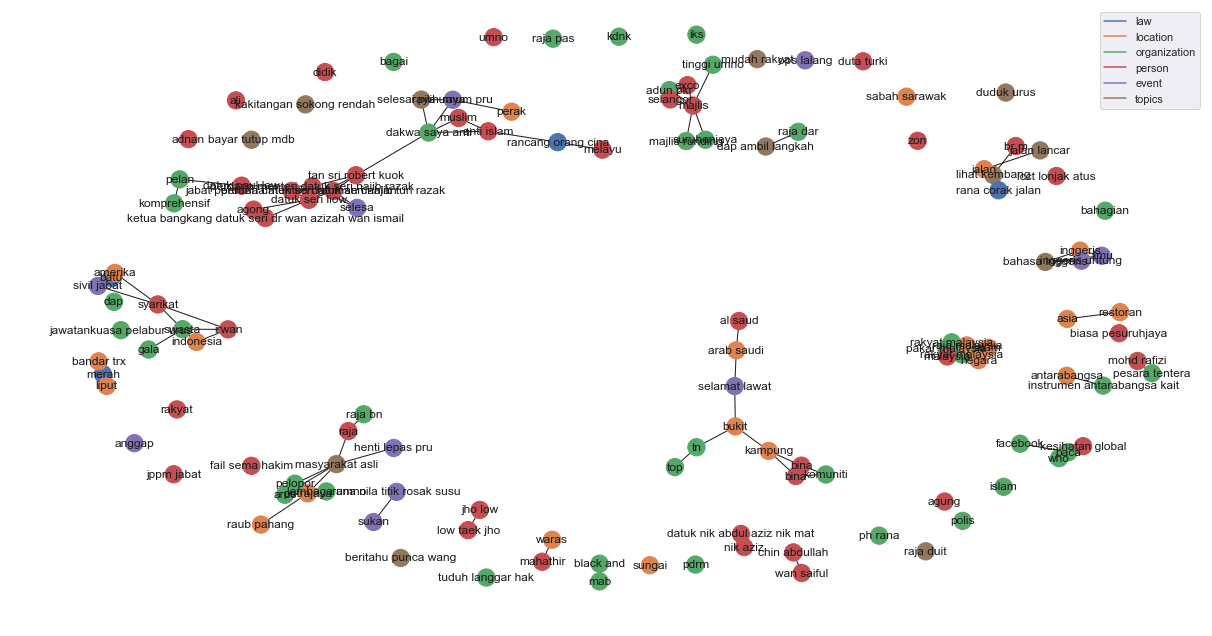

In [3]:
entity_model = malaya.entity.deep_model('luong')
topic_model = malaya.topic_model.lda
result_linking = malaya.cluster.cluster_entity_linking(corpus,
                                                       entity_model,
                                                       topic_model,
                                                       vectorizer='tfidf')

## Cluster same word structure based on POS and Entities

In [7]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

In [8]:
bahdanau_entities = malaya.entity.deep_model('bahdanau')
bahdanau_pos = malaya.pos.deep_model('bahdanau')

In [9]:
result_entities = bahdanau_entities.predict(string)
result_pos = bahdanau_pos.predict(string)

In [10]:
generated_grams = malaya.generator.pos_entities_ngram(
    result_pos,
    result_entities,
    ngram = (1, 3),
    accept_pos = ['NOUN', 'PROPN', 'VERB'],
    accept_entities = ['law', 'location', 'organization', 'person', 'time'],
)
generated_grams

['terbitan',
 'orang ramai',
 'Anthony Loke',
 'Jalan Raya',
 'sambutan',
 'Mahathir Mohamad',
 'Kuala Lumpur Sempena',
 'Mohamad',
 'Jabatan Keselamatan Jalan',
 'Sempena sambutan',
 'sekiranya',
 'kampung halaman masing-masing',
 'Menteri Pengangkutan Anthony',
 'pesanan',
 'masing-masing video',
 'masing-masing video terbitan',
 'Menteri Tun Dr',
 'Dr Mahathir menasihati',
 'Menteri',
 'mahu pulang kampung',
 'menitipkan pesanan orang',
 'Perdana Menteri Tun',
 'video terbitan',
 'Mahathir menasihati',
 'pulang kampung halaman',
 'Menteri Tun',
 'Pengangkutan Anthony',
 'mengantuk memandu',
 'depan',
 'Jkjr Dr Mahathir',
 'Pengangkutan',
 'Lumpur Sempena',
 'Loke Siew',
 'halaman masing-masing video',
 'minggu',
 'pulang kampung',
 'Mahathir',
 'Anthony Loke Siew',
 'terbitan Jabatan',
 'Keselamatan Jalan',
 'terbitan Jabatan Keselamatan',
 'Dr',
 'sekiranya mengantuk memandu',
 'Lumpur Sempena sambutan',
 'sambutan Aidilfitri minggu',
 'Jabatan',
 'tidur sekiranya',
 'Aidilfitri mi

In [11]:
malaya.cluster.cluster_words(generated_grams)

['halaman masing-masing video',
 'Anthony Loke Siew',
 'sekiranya mengantuk memandu',
 'terbitan Jabatan Keselamatan',
 'Kuala Lumpur Sempena',
 'sambutan Aidilfitri minggu',
 'Lumpur Sempena sambutan',
 'Jabatan Keselamatan Jalan',
 'orang ramai mahu',
 'Aidilfitri minggu depan',
 'Siew Fook menitipkan',
 'video terbitan Jabatan',
 'Mahathir menasihati berhenti',
 'tidur sekiranya mengantuk',
 'Pengangkutan Anthony Loke',
 'kampung halaman masing-masing',
 'Menteri Pengangkutan Anthony',
 'minggu depan Perdana',
 'Sempena sambutan Aidilfitri',
 'depan Perdana Menteri',
 'Keselamatan Jalan Raya',
 'masing-masing video terbitan',
 'Menteri Tun Dr',
 'Dr Mahathir menasihati',
 'ramai mahu pulang',
 'mahu pulang kampung',
 'berhenti berehat tidur',
 'Jalan Raya Jkjr',
 'menitipkan pesanan orang',
 'menasihati berhenti berehat',
 'Mohamad Menteri Pengangkutan',
 'Loke Siew Fook',
 'Perdana Menteri Tun',
 'pesanan orang ramai',
 'Tun Dr Mahathir',
 'pulang kampung halaman',
 'Jkjr Dr Mahath

## Cluster Part-Of-Speech

In [12]:
malaya.cluster.cluster_pos(result_pos)

{'ADJ': ['khas', 'pendek'],
 'ADP': ['kepada', 'ke', 'Dalam'],
 'ADV': ['sebentar'],
 'ADX': [],
 'AUX': [],
 'CCONJ': ['depan', 'dan'],
 'DET': ['itu'],
 'NOUN': ['sambutan',
  'pesanan',
  'orang ramai',
  'kampung halaman masing-masing',
  'video',
  'terbitan Jabatan Keselamatan',
  'Jkjr',
  'berehat',
  'sekiranya'],
 'NUM': [],
 'PART': [],
 'PRON': ['yang', 'mereka'],
 'PROPN': ['Kuala Lumpur Sempena',
  'Aidilfitri',
  'Perdana Menteri Tun Dr Mahathir Mohamad',
  'Menteri Pengangkutan Anthony Loke Siew Fook',
  'Jalan Raya',
  'Dr Mahathir'],
 'SCONJ': ['supaya', 'ketika'],
 'SYM': [],
 'VERB': ['minggu',
  'menitipkan',
  'mahu pulang',
  'menasihati',
  'berhenti',
  'tidur',
  'mengantuk'],
 'X': []}

In [13]:
malaya.cluster.cluster_entities(result_entities)

{'OTHER': ['sempena',
  'dan',
  'menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing dalam video pendek terbitan',
  'itu'],
 'law': [],
 'location': ['kuala lumpur'],
 'organization': ['menteri pengangkutan', 'jabatan keselamatan jalan raya'],
 'person': ['perdana menteri tun dr mahathir mohamad',
  'anthony loke siew fook',
  'jkjr',
  'dr mahathir'],
 'quantity': [],
 'time': ['minggu depan'],
 'event': ['sambutan aidilfitri']}